In [51]:
import matplotlib as mpl
from matplotlib import pylab
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 12),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}

mpl.style.use("seaborn")
pylab.rcParams.update(params)

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Recap

## Introduction
1. We assume knowledge of how to use trigonometry to solve problems involving right-angle triangles and acute angles. We also assume familiarity with the radian as a unit of angle measure.
1. We now want to solve equations of the form $\sin(n\theta + \alpha) = \frac{k}{cos(n \theta + \alpha)} = \frac{k}{tan(n \theta + \alpha)} = p, -1 \leq k \leq 1, \exists \, p \in \mathcal{R}$
1. Recall that trigonometric functions are periodic, meaning that they can map a given value in their domain onto multiple values in their codomain. A consequence of this is that the inverse functions need to have a carefully limited domain to prevent them from being multiple-valued (which would mean they were not, strictly speaking, functions at all). $\sin^{-1}\left(\frac{1}{\sqrt{2}}\right) = 45^{\circ}$, not $135^{\circ}$.
1. You can visualise the solutions by plotting the appropriate trig function together with the line corresponding to the y-value you want to solve for. The acute solution will be the first intersection.

## CAST diagrams
The CAST diagram shows the range of angles ${0 < \theta < 360}$, as a unit circle centred on the origin and divided into quadrants by the x- and y-axes. The quadrants are counted starting from the positive x-axis and moving counter-clockwise -- in the first quadrant, corresponding to acute angles, cos and sin are both positive. Since ${\tan = \frac{\sin}{\cos}}$, tan is also positive here. The sign of the tangent of an angle depends on whether its sine and its cosine have the same sign (both positive or both negative) or different signs.

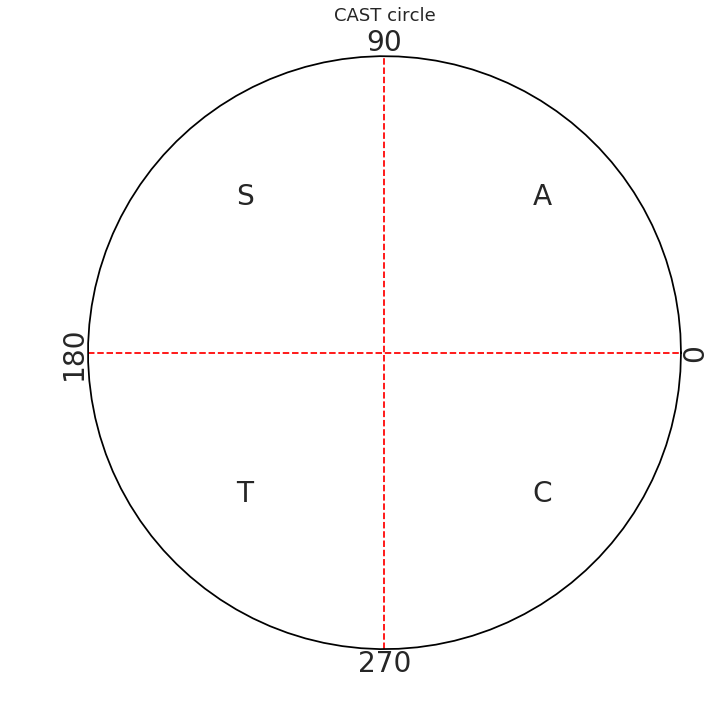

In [4]:
theta = np.linspace(0, 2*np.pi, 100)

x = np.cos(theta)
y = np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x, y, 'k')
ax.set_aspect(1)

plt.grid('off')
plt.axis('off')

plt.hlines(y=0, xmin=-1, xmax=1, linestyle='dashed', color='red')
plt.vlines(x=0, ymin=-1, ymax=1, linestyle='dashed', color='red')

plt.text(0.5, 0.5, 'A', fontsize=28)
plt.text(-0.5, 0.5, 'S', fontsize=28)
plt.text(0.5, -0.5, 'C', fontsize=28)
plt.text(-0.5, -0.5, 'T', fontsize=28)
plt.text(1, 0, '0', fontsize=28, horizontalalignment='left', verticalalignment='center', rotation='vertical')
plt.text(-1, -0, '180', fontsize=28, horizontalalignment='right', verticalalignment='center', rotation='vertical')
plt.text(0, 1, '90', fontsize=28, horizontalalignment='center', verticalalignment='bottom')
plt.text(0, -1, '270', fontsize=28, horizontalalignment='center', verticalalignment='top')

plt.title('CAST circle', fontsize=18);

Let's look at the quadrants on a plot of sin and cos waves:

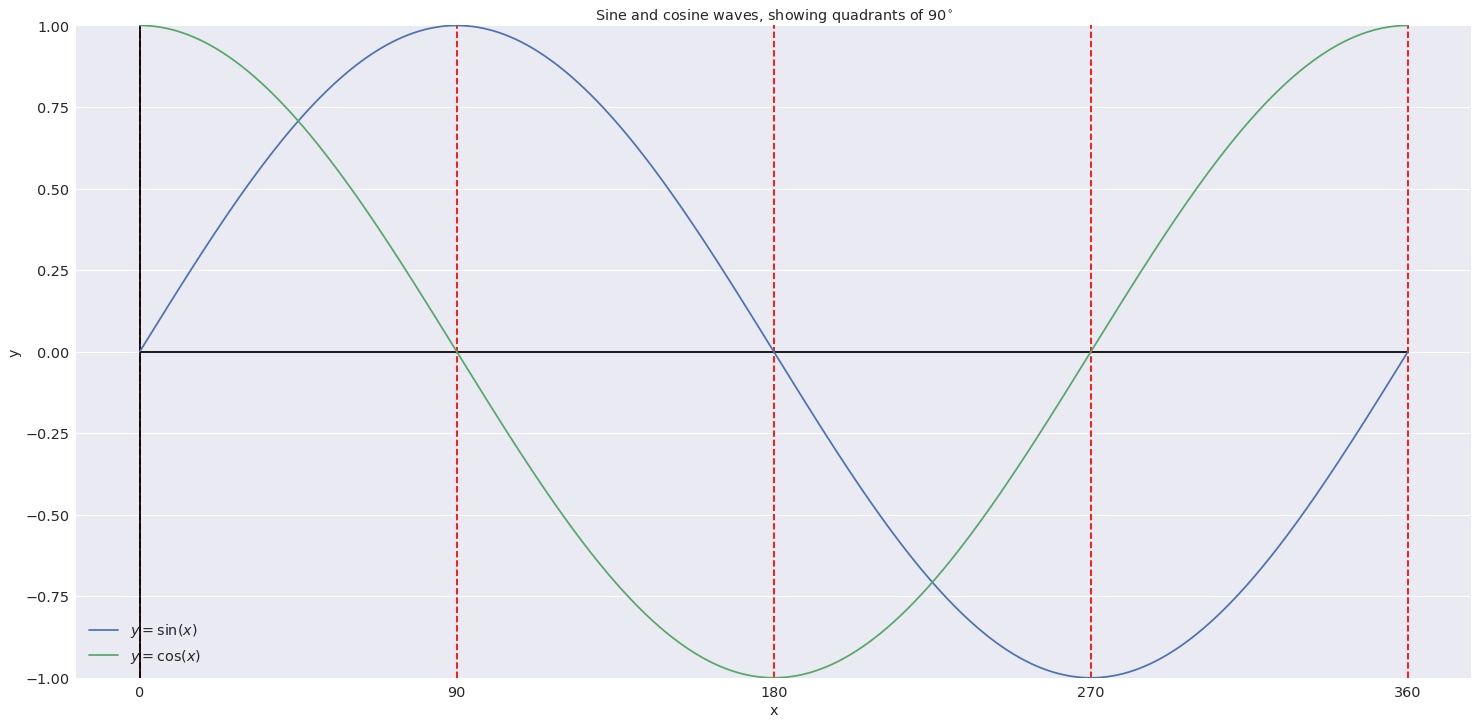

In [81]:
xs = np.arange(0, 360, 0.01)
ys_sin, ys_cos = np.sin(xs * (2*np.pi) / 360), np.cos(xs * (2*np.pi) / 360)

plt.plot(xs, ys_sin, label=f'$y = \\sin(x)$')
plt.plot(xs, ys_cos, label=f'$y = \\cos(x)$')
plt.title('Sine and cosine waves, showing quadrants of $90^{\\circ}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
plt.vlines(x=np.arange(0, 361, 90), ymin=-1, ymax=1, linestyle='dashed', color='red')
plt.axes().xaxis.set_ticks(np.arange(0, 361, 90))
plt.ylim(-1, 1)
plt.vlines(x=0, ymin=-1, ymax=1);

As expected, $\tan(\theta)$ is the only positive function in the third quadrant:

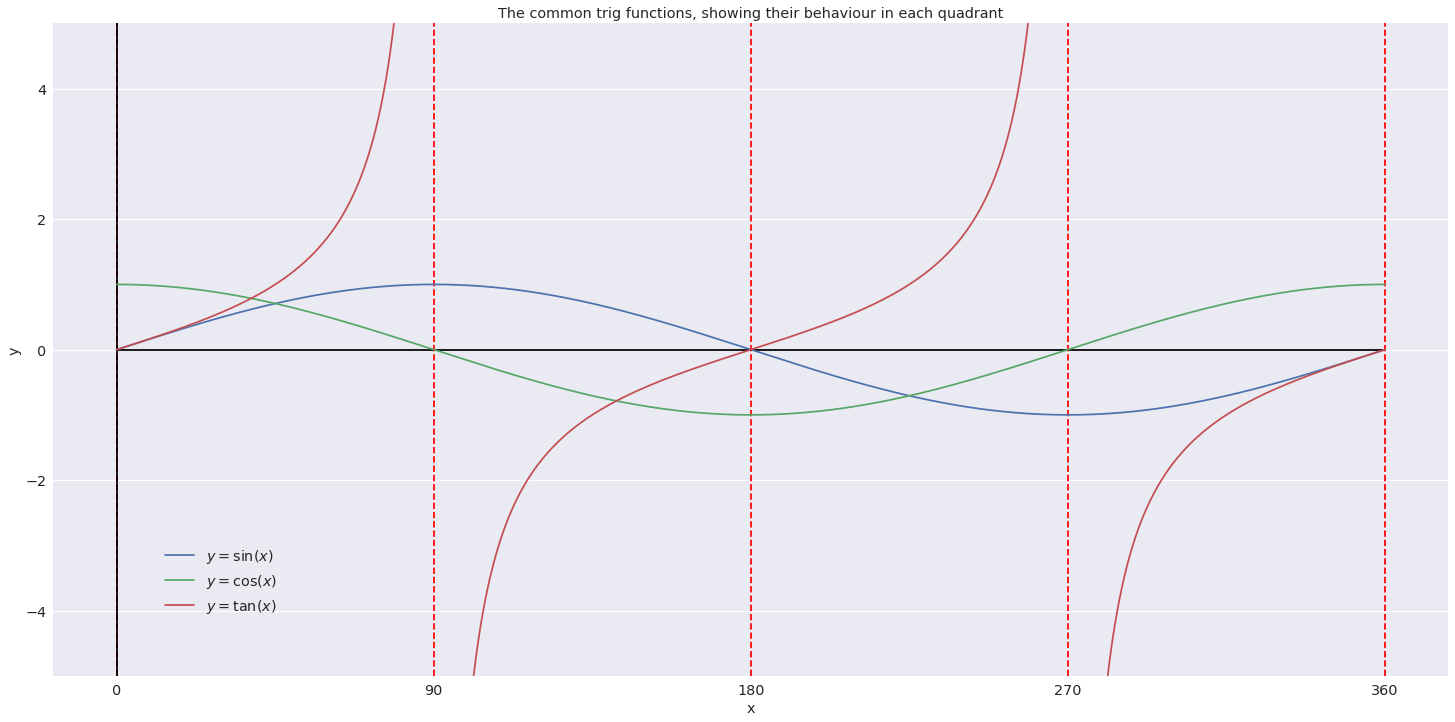

In [96]:
xs = np.arange(0, 360, 0.01)
ys_sin, ys_cos, ys_tan = np.sin(xs * (2*np.pi) / 360), np.cos(xs * (2*np.pi) / 360), np.tan(xs * (2*np.pi) / 360)

ys_tan = np.vectorize(lambda x: np.nan if abs(x) > 5 else x)(ys_tan)


plt.plot(xs, ys_sin, label=f'$y = \\sin(x)$')
plt.plot(xs, ys_cos, label=f'$y = \\cos(x)$')
plt.plot(xs, ys_tan, label=f'$y = \\tan(x)$')
plt.title('The common trig functions, showing their behaviour in each quadrant')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left', bbox_to_anchor=(0.18, 0.18), bbox_transform=plt.gcf().transFigure)
plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
plt.vlines(x=np.arange(0, 361, 90), ymin=-5, ymax=5, linestyle='dashed', color='red')
plt.axes().xaxis.set_ticks(np.arange(0, 361, 90))
plt.ylim(-5, 5)
plt.vlines(x=0, ymin=-5, ymax=5);

## Example

Let's look back at the example, where we were considering positive and negative $\theta$ values. Remember that sin is an odd function and cos is an even function; as a ratio of an odd and an even function, tan is an odd function. This is really helpful in working out which functions are positive between $0^{\circ}$ and $-360^{\circ}$.

Another way of thinking about it is that $360^{\circ}$ is the period of a full waveform for each of the functions, so moving $360^{\circ}$ left is equivalent to going back to the origin. The symmetry here is translational; it's not a reflection about the origin.

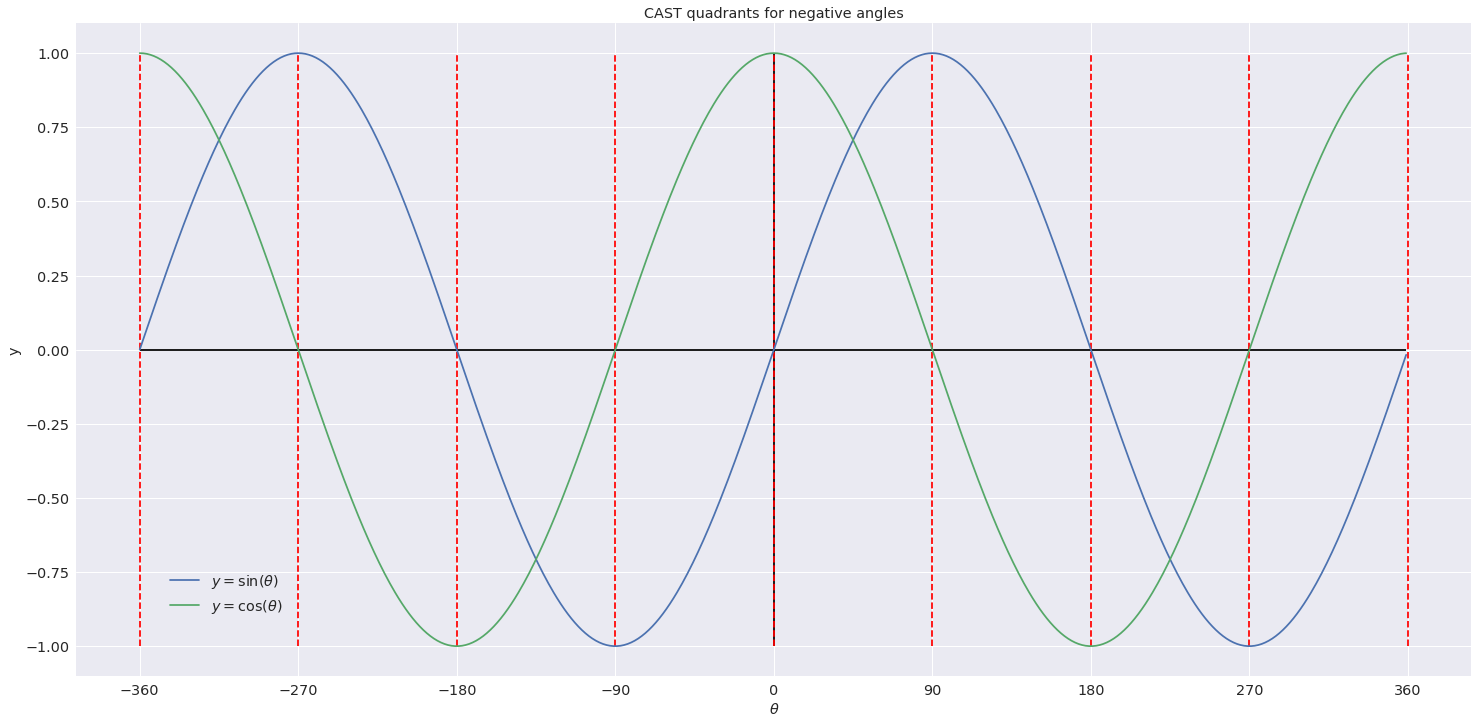

In [98]:
xs = np.arange(-360, 360, 1)
ys_sin, ys_cos = np.sin(xs * (2*np.pi) / 360 ), np.cos(xs * (2*np.pi) / 360)

plt.plot(xs, ys_sin, label=f'$y = \sin(\\theta)$')
plt.plot(xs, ys_cos, label=f'$y = \cos(\\theta)$')
plt.title('CAST quadrants for negative angles')
plt.xlabel('$\\theta$')
plt.ylabel('y')
# plt.legend(loc='upper center')
plt.legend(loc='lower left', bbox_to_anchor=(0.17, 0.18), bbox_transform=plt.gcf().transFigure)
plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
plt.vlines(x=0, ymin=-1, ymax=1)
plt.vlines(x=np.arange(-360, 361, 90), ymin=-1, ymax=1, linestyle='dashed', color='red')
plt.axes().xaxis.set_ticks(np.arange(-360, 361, 90));

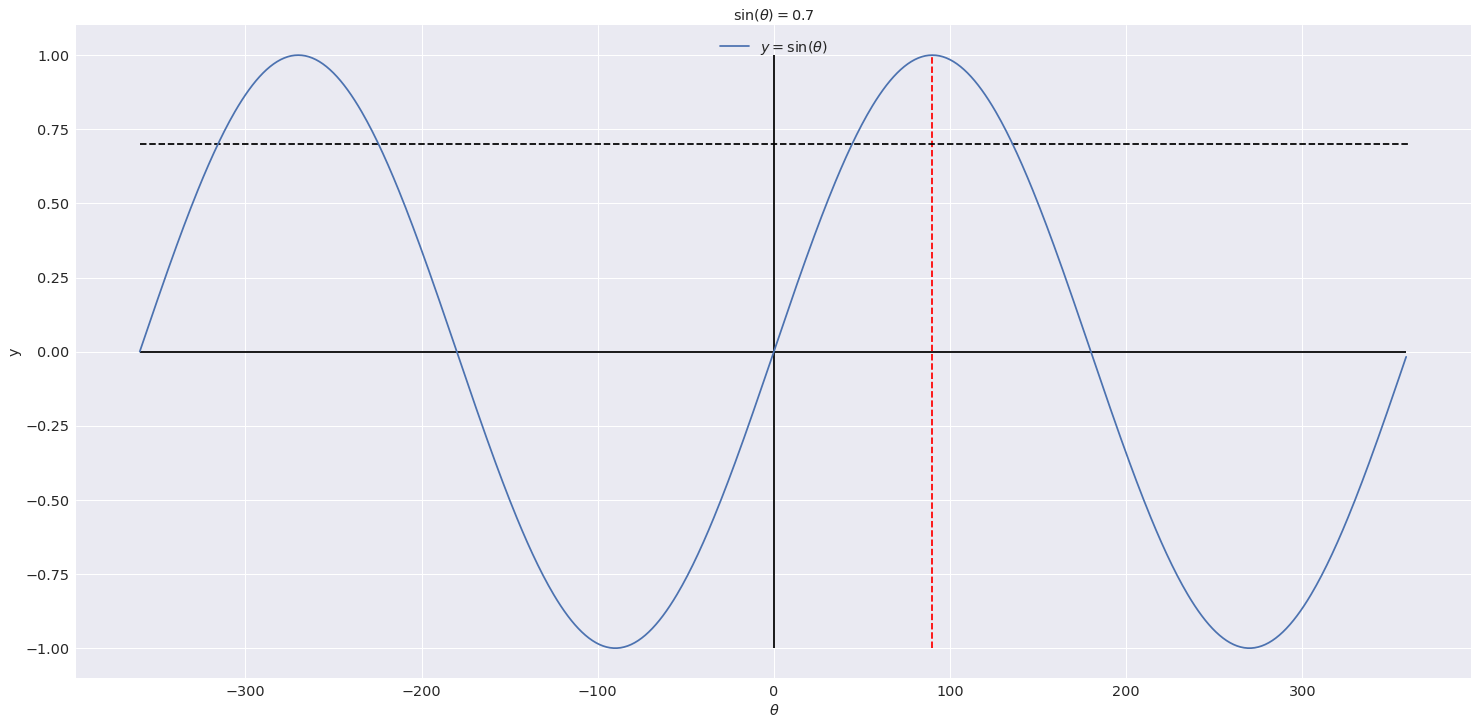

In [27]:
xs = np.arange(-360, 360, 1)
ys_sin, ys_cos = np.sin(xs * (2*np.pi) / 360 ), np.cos(xs * (2*np.pi) / 360)

plt.plot(xs, ys_sin, label=f'$y = \sin(\\theta)$')
plt.title('$\\sin(\\theta) = 0.7$')
plt.xlabel('$\\theta$')
plt.ylabel('y')
plt.legend(loc='upper center')
plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
plt.vlines(x=0, ymin=-1, ymax=1)
plt.vlines(x=90, ymin=-1, ymax=1, linestyle='dashed', color='red')
plt.hlines(y=0.7, xmin=-360, xmax=360, linestyle='dotted');

So we can see that there are two positive solutions (where the dotted black line $y=0.7$ crosses the wave), only one of which is in the acute or first quadrant (angles under $90^{\circ}$, between the x-axis and the dashed red vertical line). As expected, there are also two negative solutions where $\phi$ is offset by $-360^{\circ}$.

To deal with the more difficult case where the argument of the sin function is ${2\theta - 30^{\circ}}$, we can use the substitution ${\phi = 2\theta - 30}$, remembering to convert the range of $\theta$ values into a range of $\phi$ values. Solving for $\phi$ is then equivalent to solving for $\theta$; we just reverse the transformation at the end.

Let's look at this in terms of the $90^{\circ}$ quadrants. Bear in mind that the factor of two here gives us two full waves; the offset of $30^{\circ}$ gives us nine quadrants, not all of which are complete.

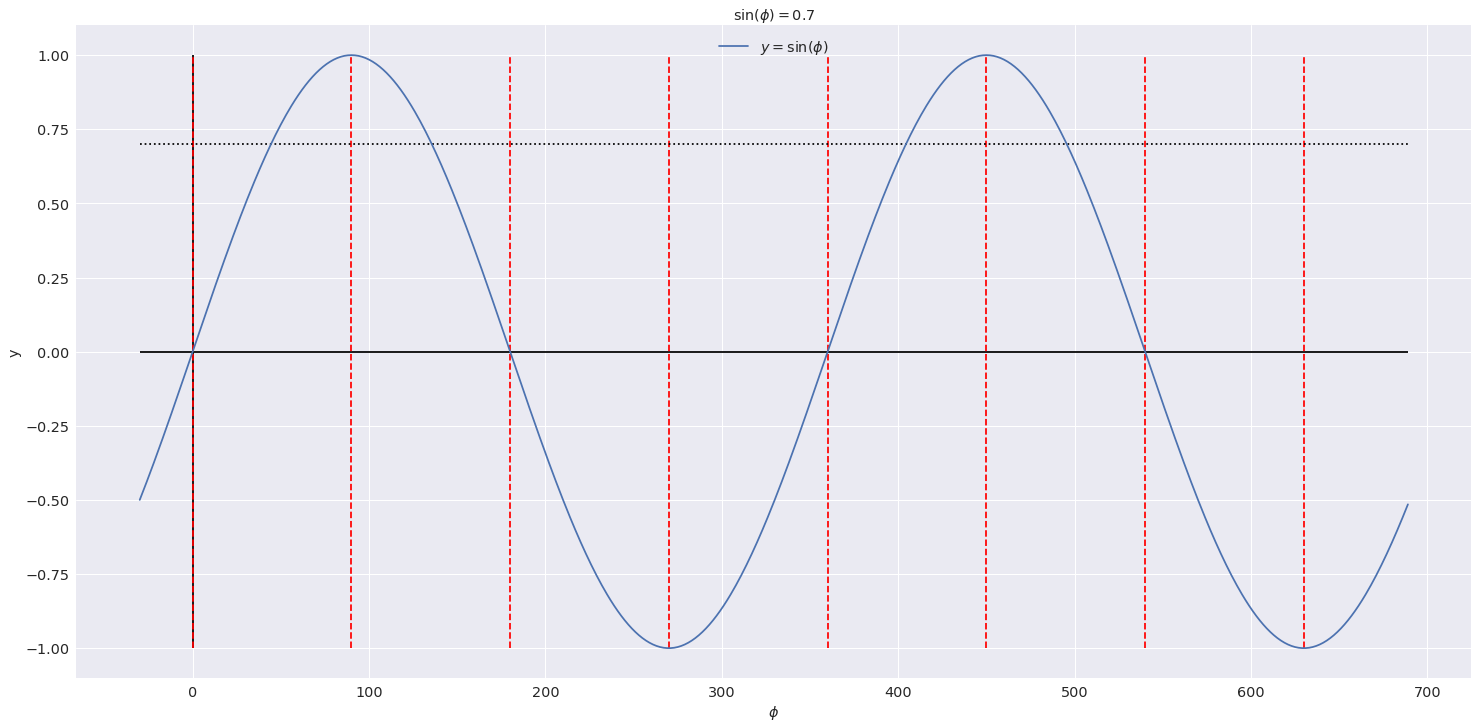

In [46]:
xs = np.arange(-30, 690, 1)
ys_sin, ys_cos = np.sin(xs * (2*np.pi) / 360 ), np.cos(xs * (2*np.pi) / 360)

plt.plot(xs, ys_sin, label=f'$y = \sin(\\phi)$')
plt.title('$\\sin(\\phi) = 0.7$')
plt.xlabel('$\\phi$')
plt.ylabel('y')
plt.legend(loc='upper center')
plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
plt.vlines(x=0, ymin=-1, ymax=1)
plt.vlines(x=np.arange(0, 691, 90), ymin=-1, ymax=1, linestyle='dashed', color='red')
plt.hlines(y=0.7, xmin=min(xs), xmax=max(xs), linestyle='dotted');

The effect of changing the range of angles in which we are looking for a solution to ${-30 < \phi < 690}$ has now given us four solutions where ${\phi > 0}$. Our acute solution is $\phi_0 = \sin^{-1}(0.7) \approx 44.4^{\circ}$ (remember that the normal definition of $\sin^{-1}$ is such that it can only return a positive or negative acute angle, to ensure it is single-valued). Looking at the symmetries of the waveform above, we can see that the other solutions must be:

\begin{align}
\phi_1 &= 90^{\circ} + (90^{\circ} - \phi_0) &\approx 135.6^{\circ} \\
\phi_2 &= 450^{\circ} - (90^{\circ} - \phi_0) &\approx 404.4^{\circ} \\
\phi_3 &= 450^{\circ} + (90^{\circ} - \phi_0) &\approx 495.6^{\circ}
\end{align}

And reversing the substitution,

\begin{align}
\theta_0 &= \frac{1}{2} (\phi_0 + 30^{\circ}) &\approx 37.2^{\circ}\\
\theta_1 &= \frac{1}{2} (\phi_1 + 30^{\circ}) &\approx 82.8^{\circ}\\
\theta_2 &= \frac{1}{2} (\phi_2 + 30^{\circ}) &\approx 172.8^{\circ}\\
\theta_3 &= \frac{1}{2} (\phi_3 + 30^{\circ}) &\approx 217.2^{\circ}
\end{align}

Be careful to ensure consistency when making and reversing the substitution. In particular, double-check the range to ensure it is consistent. It's useful to do a second check that your solutions satisfy the original equation and fall within the limits on the original variable.

## CAST method

We can do something very similar with the CAST diagram, using the fact that it's a unit circle and by constructing triangles and reasoning about similar angles. This is equivalent to thinking about the symmetries of the waveform before. Our $\phi_0$ before gives us the first angle, measured counter-clockwise with respect to the positive x-axis.

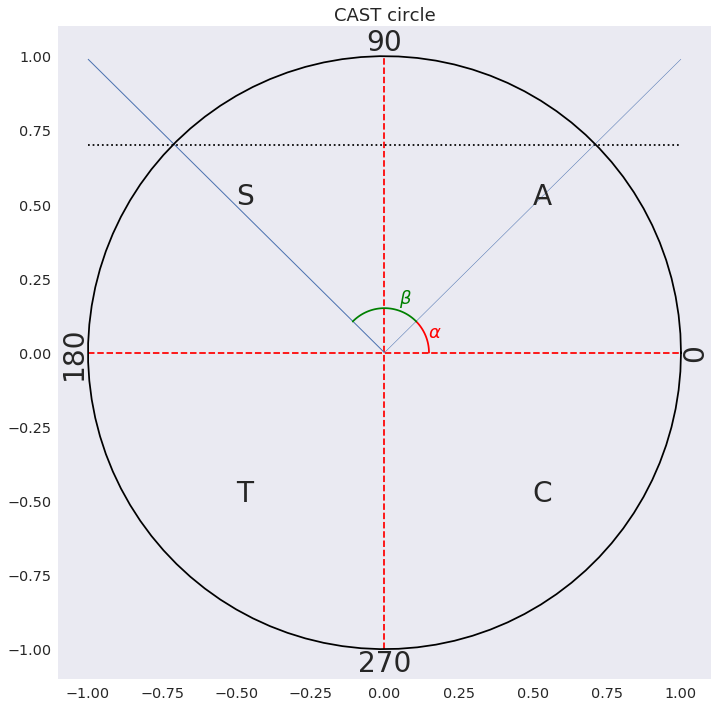

In [120]:
theta = np.linspace(0, 2*np.pi, 100)

# For unit circle
x = np.cos(theta)
y = np.sin(theta)

# For first angle
alpha = np.linspace(0, (44.4/360) * 2*np.pi, 100)
x1 = 0.15 * np.cos(alpha)
y1 = 0.15 * np.sin(alpha)

# And second angle
beta = np.linspace((44.4/360) * 2*np.pi, (135.6/360) * 2*np.pi, 100)
x2 = 0.15 * np.cos(beta)
y2 = 0.15 * np.sin(beta)

fig, ax = plt.subplots(1)

ax.plot(x, y, 'k')
ax.set_aspect(1)

plt.grid('off')
# plt.axis('off')

plt.hlines(y=0, xmin=-1, xmax=1, linestyle='dashed', color='red')
plt.vlines(x=0, ymin=-1, ymax=1, linestyle='dashed', color='red')

plt.text(0.5, 0.5, 'A', fontsize=28)
plt.text(-0.5, 0.5, 'S', fontsize=28)
plt.text(0.5, -0.5, 'C', fontsize=28)
plt.text(-0.5, -0.5, 'T', fontsize=28)
plt.text(1, 0, '0', fontsize=28, horizontalalignment='left', verticalalignment='center', rotation='vertical')
plt.text(-1, -0, '180', fontsize=28, horizontalalignment='right', verticalalignment='center', rotation='vertical')
plt.text(0, 1, '90', fontsize=28, horizontalalignment='center', verticalalignment='bottom')
plt.text(0, -1, '270', fontsize=28, horizontalalignment='center', verticalalignment='top')
plt.text(0.17, 0.1, '$\\alpha$', fontsize=18, horizontalalignment='center', verticalalignment='top', color='r')
plt.text(0.07, 0.22, '$\\beta$', fontsize=18, horizontalalignment='center', verticalalignment='top', color='g')
plt.hlines(y=0.7, xmin=-1, xmax=1, linestyle='dotted')

gr=0.99
xs = np.arange(0, 1.01, 0.01)
segs = []
segs.append(np.asarray([p for p in zip(xs, gr*xs)]))
segs.append(np.asarray([p for p in zip(-1 * xs, gr*xs)]))

ax.plot(x1, y1, 'r')
ax.plot(x2, y2, 'g')
line_segments = LineCollection(segs, linewidths=(0.5, 1, 1.5, 2), linestyle='solid')
ax.add_collection(line_segments)
plt.title('CAST circle', fontsize=18);

Considering that the dashed line represents $y=0.7$, and labelling $\alpha$ the angle subtended at the origin by the ray (pale blue line) which intersects the unit circle at the point where it crosses $y=0.7$, we can see that $\alpha = \sin^{-1}(0.7) = \phi_0$ and the angle across from it must be identical by the circle's rotational symmetry about the y-axis.

Since they and the angle between them $\beta$ must sum to ${180^{\circ}}$, we have $\alpha + \beta = 180^{\circ} - \phi_0 = \phi_1$, our second solution. The rotational symmetry of this diagram corresponds to the waveform's phase symmetry of $360^{\circ}$ -- this means that we can simply find any further solutions by adding $360^{\circ}$ to those we have already found, until we have reached the end of the range in which we are looking ($-30^{\circ} < \phi < 690^{\circ}$). As before, we need to bear in mind that we're thinking in terms of our substituted angle ($\phi$) here; to get answers in terms of $\theta$ we need to reverse the substitution at the end.

# More diffcult examples

You can solve more difficult examples by careful use of substitutions you've already encountered:

1. $\sin x - 2 \cos x = 0$ -- divide through by $\cos x$ and use $\tan x = \frac{\sin x}{\cos x}$.
1. $\tan^2 x + \tan x - 2 = 0$ -- recognise that this is quadratic in $\tan x$, substitute, and solve the quadratic (bear in mind each real root of the quadratic potentially gives two solutions!).
1. $2\cos^2 x - \sin x + 1 = 0$ -- recall $\cos^2 x = 1 - \sin^2 x$, and the equation is now quadratic in $\sin x$.